In [1]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd
import sklearn as sk

 ## Algoritmo PCA

####  Primer metodo

In [234]:
def PCA_max(x):
    
    data = pd.DataFrame(x)
    
    mu = data.mean()
    S = data.cov()
    
    w,v = np.linalg.eig(S)
    
    direcc = v[np.where(w.max()==w)[0]]
    
    separados = direcc @ data[[0,1]].T

    return separados.to_numpy().squeeze(),direcc.squeeze()
    
    
    

In [239]:
data = np.loadtxt("minicorpus.txt")

data = pd.DataFrame(data, columns=[0,1,'Clase'])

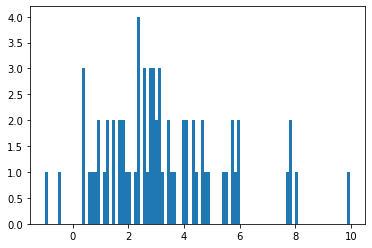

In [240]:
[graf, d]= PCA_max(data[[0,1]])
pl.hist(graf.T,bins=100);

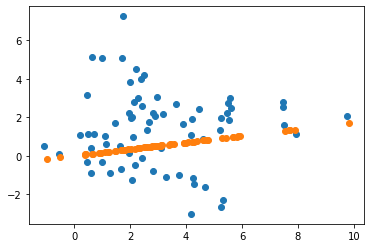

In [241]:
proyeccion = np.array([np.dot(d,k) for k in graf]).squeeze()
pl.scatter(data[0],data[1])
pl.scatter(proyeccion.T[0],proyeccion.T[1]);

#### Segundo método

In [242]:
def PCA_min(x,N):
    
    data = pd.DataFrame(x)
    
    if data.loc[0].count() < N:
        return 0
    
    mu = data.mean()
    S = data.cov()
    
    w,v = np.linalg.eig(S)
        
    direcc = v[np.argpartition(w,1)[:N]]
    
    separados = direcc @ data.T
    
    return separados.to_numpy().squeeze(),direcc.squeeze()

In [243]:
data = np.loadtxt("minicorpus.txt")

data = pd.DataFrame(data, columns=[0,1,'Clase'])


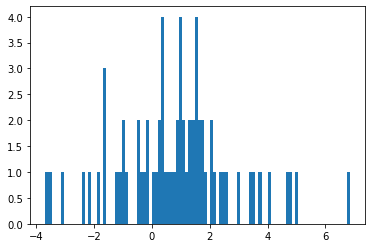

In [244]:
n=1

PCA_min_f,d = PCA_min(data[[0,1]],n)
pl.hist(PCA_min_f.T,bins=100);


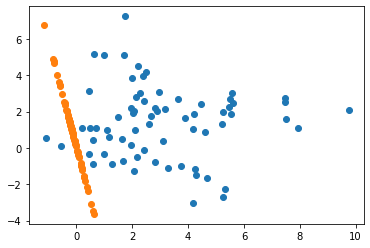

In [246]:
proyeccion = np.array([np.dot(d,k) for k in PCA_min_f.T]).squeeze()
pl.scatter(data[[0]],data[[1]])
pl.scatter(proyeccion.T[0],proyeccion.T[1]);

## Punto 2

In [391]:
def mezclar(S,M):
    return M@S

In [392]:
s = np.random.randn(2,100)

Mezcla = [[0.5,-0.5],[-0.5,0.5]]
Mezcla = np.array(Mezcla)

x = mezclar(s,Mezcla)

In [393]:
x.std()

0.653239465501843

##  Punto 3

In [464]:

s_gauss = np.random.normal(loc=0,scale=1,size=(2,200))
s_laplace = np.random.laplace(loc=0,scale=1,size=(2,100))

m_ortogonal=[[0.2,1],[0.2,-1]]
m_no_ortogonal=[[0.6,0.8],[0.3,-0.2]]

##### Mezclo

In [465]:

x_g_o = mezclar(s_gauss, m_ortogonal)
x_g_no = mezclar(s_gauss, m_no_ortogonal)

x_l_o = mezclar(s_laplace,m_ortogonal)
x_l_no = mezclar(s_laplace,m_no_ortogonal)


##### Aplico PCA

In [466]:
N=1

x_g_o_PCA,dir_g_o = PCA_min(x_g_o.T,N)
proyeccion_g_o = np.array([np.dot(dir_g_o,k) for k in x_g_o_PCA.T]).squeeze().T

x_g_no_PCA,dir_g_no = PCA_min(x_g_no.T,N)
proyeccion_g_no = np.array([np.dot(dir_g_no,k) for k in x_g_no_PCA.T]).squeeze().T

x_l_o_PCA,dir_l_o = PCA_min(x_l_o.T,N)
proyeccion_l_o = np.array([np.dot(dir_l_o,k) for k in x_l_o_PCA.T]).squeeze().T

x_l_no_PCA,dir_l_no = PCA_min(x_l_no.T,N)
proyeccion_l_no = np.array([np.dot(dir_l_no,k) for k in x_l_no_PCA.T]).squeeze().T



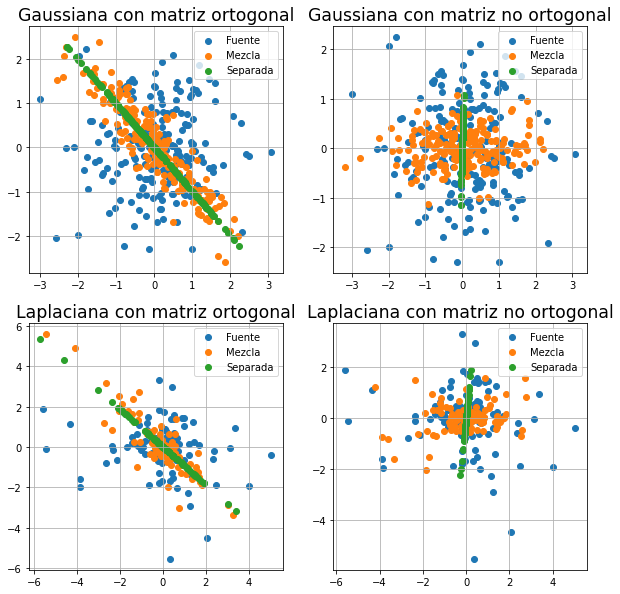

In [467]:
fig, ax = pl.subplots(2,2, figsize=[10,10])

g_s = ax[0][0].scatter(s_gauss[0],s_gauss[1])
g_x = ax[0][0].scatter(x_g_o[0],x_g_o[1])
g_x_pca = ax[0][0].scatter(proyeccion_g_o[0],proyeccion_g_o[1])
ax[0][0].grid()
ax[0][0].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[0][0].set_title("Gaussiana con matriz ortogonal",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[0][1].scatter(s_gauss[0],s_gauss[1])
g_x = ax[0][1].scatter(x_g_no[0],x_g_no[1])
g_x_pca = ax[0][1].scatter(proyeccion_g_no[0],proyeccion_g_no[1])
ax[0][1].grid()
ax[0][1].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[0][1].set_title("Gaussiana con matriz no ortogonal",fontsize='xx-large');

g_s = ax[1][0].scatter(s_laplace[0],s_laplace[1])
g_x = ax[1][0].scatter(x_l_o[0],x_l_o[1])
g_x_pca = ax[1][0].scatter(proyeccion_l_o[0],proyeccion_l_o[1])
ax[1][0].grid()
ax[1][0].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[1][0].set_title("Laplaciana con matriz ortogonal",fontsize='xx-large');

g_s = ax[1][1].scatter(s_laplace[0],s_laplace[1])
g_x = ax[1][1].scatter(x_l_no[0],x_l_no[1])
g_x_pca = ax[1][1].scatter(proyeccion_l_no[0],proyeccion_l_no[1])
ax[1][1].grid()
ax[1][1].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[1][1].set_title("Laplaciana con matriz no ortogonal",fontsize='xx-large');


##### Busco W

In [442]:
w,v = np.linalg.eig(np.cov(x_g_o))

diag = np.diag(1./np.sqrt(w))

W = np.dot(diag,v)
np.linalg.inv(W)

array([[-0.21741416, -1.01946798],
       [ 0.2153225 , -1.02937116]])

In [443]:
m_ortogonal

[[0.2, 1], [0.2, -1]]

In [446]:
w,v = np.linalg.eig(np.cov(x_g_no))

diag = np.diag(1./np.sqrt(w))

W = np.dot(diag,v)
np.linalg.inv(W)

array([[ 1.03424204,  0.0166998 ],
       [-0.04485568,  0.38504889]])

In [447]:
m_no_ortogonal

[[0.6, 0.8], [0.3, -0.2]]

#### Con ruido gaussiano

In [448]:
tam = [2,200]

s_gauss = np.random.normal(loc=0,scale=1,size=tam)
s_laplace = np.random.laplace(loc=0,scale=1,size=tam)

m_ortogonal=[[0.2,1],[0.2,-1]]
m_no_ortogonal=[[0.6,0.8],[0.3,-0.2]]

Mezclo

In [449]:
x_g_o = mezclar(s_gauss,m_ortogonal) + np.random.randn(tam[0],tam[1])
x_g_no = mezclar(s_gauss,m_no_ortogonal) + np.random.randn(tam[0],tam[1])

x_l_o = mezclar(s_laplace,m_ortogonal) + np.random.randn(tam[0],tam[1])
x_l_no = mezclar(s_laplace,m_no_ortogonal) + np.random.randn(tam[0],tam[1])


Aplico PCA algoritmo MEF

In [450]:
N=1

x_g_o_PCA,dir_g_o = PCA_min(x_g_o.T,N)
proyeccion_g_o = np.array([np.dot(dir_g_o,k) for k in x_g_o_PCA.T]).squeeze().T

x_g_no_PCA,dir_g_no = PCA_min(x_g_no.T,N)
proyeccion_g_no = np.array([np.dot(dir_g_no,k) for k in x_g_no_PCA.T]).squeeze().T

x_l_o_PCA,dir_l_o = PCA_min(x_l_o.T,N)
proyeccion_l_o = np.array([np.dot(dir_l_o,k) for k in x_l_o_PCA.T]).squeeze().T

x_l_no_PCA,dir_l_no = PCA_min(x_l_no.T,N)
proyeccion_l_no = np.array([np.dot(dir_l_no,k) for k in x_l_no_PCA.T]).squeeze().T

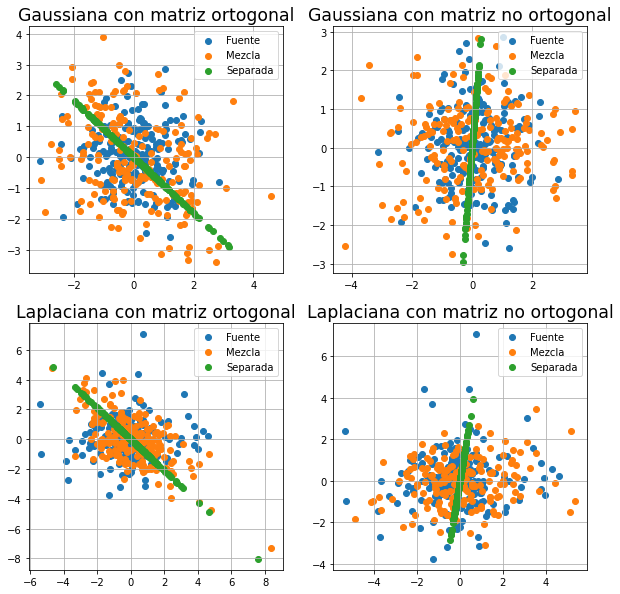

In [455]:
fig, ax = pl.subplots(2,2, figsize=[10,10])

g_s = ax[0][0].scatter(s_gauss[0],s_gauss[1])
g_x = ax[0][0].scatter(x_g_o[0],x_g_o[1])
g_x_pca = ax[0][0].scatter(proyeccion_g_o[0],proyeccion_g_o[1])
ax[0][0].grid()
ax[0][0].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[0][0].set_title("Gaussiana con matriz ortogonal",fontsize='xx-large');

#ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)

g_s = ax[0][1].scatter(s_gauss[0],s_gauss[1])
g_x = ax[0][1].scatter(x_g_no[0],x_g_no[1])
g_x_pca = ax[0][1].scatter(proyeccion_g_no[0],proyeccion_g_no[1])
ax[0][1].grid()
ax[0][1].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[0][1].set_title("Gaussiana con matriz no ortogonal",fontsize='xx-large');

g_s = ax[1][0].scatter(s_laplace[0],s_laplace[1])
g_x = ax[1][0].scatter(x_l_o[0],x_l_o[1])
g_x_pca = ax[1][0].scatter(proyeccion_l_o[0],proyeccion_l_o[1])
ax[1][0].grid()
ax[1][0].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[1][0].set_title("Laplaciana con matriz ortogonal",fontsize='xx-large');

g_s = ax[1][1].scatter(s_laplace[0],s_laplace[1])
g_x = ax[1][1].scatter(x_l_no[0],x_l_no[1])
g_x_pca = ax[1][1].scatter(proyeccion_l_no[0],proyeccion_l_no[1])
ax[1][1].grid()
ax[1][1].legend((g_s,g_x,g_x_pca),('Fuente','Mezcla','Separada'), loc='upper right')
ax[1][1].set_title("Laplaciana con matriz no ortogonal",fontsize='xx-large');

##### Busco W

In [452]:
w,v = np.linalg.eig(np.cov(x_g_o))

diag = np.diag(1./np.sqrt(w))

W = np.dot(diag,v)
np.linalg.inv(W)

array([[-0.85487091, -1.08229804],
       [ 0.77694127, -1.19085591]])

In [453]:
m_ortogonal

[[0.2, 1], [0.2, -1]]

In [454]:
w,v = np.linalg.eig(np.cov(x_g_no))

diag = np.diag(1./np.sqrt(w))

W = np.dot(diag,v)
np.linalg.inv(W)

array([[ 1.46791567,  0.10618045],
       [-0.15331443,  1.01662933]])

In [415]:
m_no_ortogonal

[[0.6, 0.8], [0.3, -0.2]]